In [1]:
import pandas as pd

In [2]:
# get price data
df = pd.read_csv("price-data.csv")
df.head()

,timestamp,bitcoin,ethereum,ripple,solana,binancecoin,dogecoin,cardano,staked-ether,tron,...,render-token,bittensor,kaspa,filecoin,fetch-ai,arbitrum,virtual-protocol,gatechain-token,cosmos,ethena
0,2020-01-02 00:00:00.000,7193.754668,130.484685,0.192556,NaN,13.685902,0.002026,0.033362,NaN,0.013199,...,NaN,NaN,NaN,NaN,0.038686,NaN,NaN,0.353788,4.381528,NaN
1,2020-01-03 00:00:00.000,6963.853354,127.045258,0.187433,NaN,13.007171,0.002008,0.032618,NaN,0.012845,...,NaN,NaN,NaN,NaN,0.036687,NaN,NaN,0.343728,4.098819,NaN
2,2020-01-04 00:00:00.000,7300.346935,133.702649,0.192299,NaN,13.603276,0.002049,0.033967,NaN,0.013371,...,NaN,NaN,NaN,NaN,0.038930,NaN,NaN,0.353166,4.227682,NaN
3,2020-01-05 00:00:00.000,7351.377053,134.136883,0.192812,NaN,13.794575,0.002189,0.034298,NaN,0.013438,...,NaN,NaN,NaN,NaN,0.040255,NaN,NaN,0.354280,4.253197,NaN
4,2020-01-06 00:00:00.000,7349.972248,135.005714,0.193816,NaN,14.006361,0.002070,0.034427,NaN,0.013512,...,NaN,NaN,NaN,NaN,0.038340,NaN,NaN,0.386061,4.199192,NaN


Compute daily log returns

In [3]:
import numpy as np

In [4]:
# set timestamp column as the index
df.set_index("timestamp", inplace=True)

# compute daily log returns from daily price data
log_returns = np.log(df / df.shift(1))
log_returns.head()

,bitcoin,ethereum,ripple,solana,binancecoin,dogecoin,cardano,staked-ether,tron,chainlink,...,render-token,bittensor,kaspa,filecoin,fetch-ai,arbitrum,virtual-protocol,gatechain-token,cosmos,ethena
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00.000,-0.032480,-0.026712,-0.026961,NaN,-0.050866,-0.008557,-0.022558,NaN,-0.027241,-0.038120,...,NaN,NaN,NaN,NaN,-0.053068,NaN,NaN,-0.028847,-0.066699,NaN
2020-01-04 00:00:00.000,0.047189,0.051075,0.025629,NaN,0.044810,0.019956,0.040541,NaN,0.040143,0.037832,...,NaN,NaN,NaN,NaN,0.059354,NaN,NaN,0.027087,0.030955,NaN
2020-01-05 00:00:00.000,0.006966,0.003242,0.002662,NaN,0.013965,0.066308,0.009696,NaN,0.004981,0.013014,...,NaN,NaN,NaN,NaN,0.033460,NaN,NaN,0.003148,0.006017,NaN
2020-01-06 00:00:00.000,-0.000191,0.006456,0.005193,NaN,0.015236,-0.055854,0.003744,NaN,0.005511,-0.017516,...,NaN,NaN,NaN,NaN,-0.048730,NaN,NaN,0.085908,-0.012779,NaN


Check for seasonality effects according to the parts of the month - across all coins

In [5]:
# compute the returns of the aggregate for each day
aggregate = pd.DataFrame({"aggregate": log_returns.mean(axis=1)})
aggregate.head()

,aggregate
timestamp,
2020-01-02 00:00:00.000,NaN
2020-01-03 00:00:00.000,-0.032993
2020-01-04 00:00:00.000,0.048107
2020-01-05 00:00:00.000,0.016507
2020-01-06 00:00:00.000,0.003813


In [6]:
# add day of the month column
aggregate["day_of_month"] = pd.to_datetime(log_returns.index).day
aggregate.head()

,aggregate,day_of_month
timestamp,,
2020-01-02 00:00:00.000,NaN,2
2020-01-03 00:00:00.000,-0.032993,3
2020-01-04 00:00:00.000,0.048107,4
2020-01-05 00:00:00.000,0.016507,5
2020-01-06 00:00:00.000,0.003813,6


In [7]:
# compute the mean of the aggregate's returns, grouped by day of the month
mean_by_day_of_month = aggregate.groupby("day_of_month").mean()
mean_by_day_of_month.head()

,aggregate
day_of_month,
1,0.003974
2,0.009814
3,-0.000127
4,0.000271
5,0.003412


Visualization

In [8]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mean Log Return')

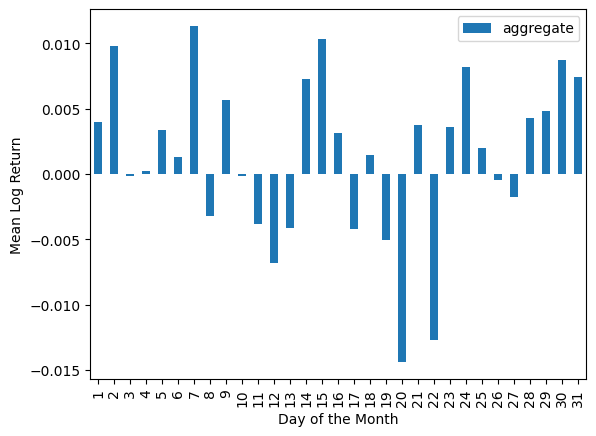

In [9]:
# plot the mean of the aggregate returns, grouped by day of the month
mean_by_day_of_month.plot(kind="bar")
plt.xlabel("Day of the Month")
plt.ylabel("Mean Log Return")

In [10]:
# compute median of the aggregate returns, grouped by day of the month
median_by_day_of_month = aggregate.groupby("day_of_month").median()
median_by_day_of_month.head()

,aggregate
day_of_month,
1,0.002124
2,0.008956
3,-0.000238
4,0.001802
5,0.005604


Text(0, 0.5, 'Median Log Return')

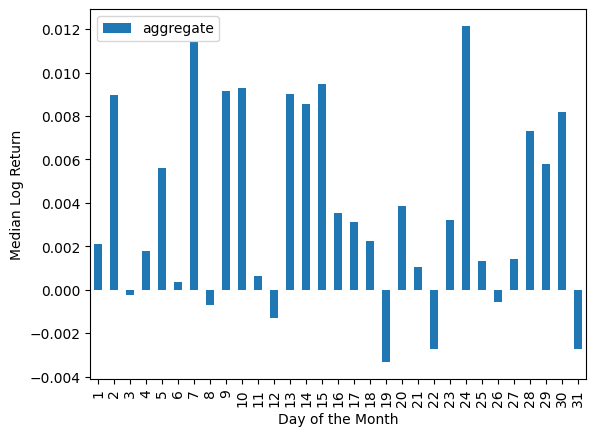

In [12]:
# plot median of aggregate returns, grouped by day of the week - maybe mean was dominated by outliers
median_by_day_of_month.plot(kind="bar")
plt.xlabel("Day of the Month")
plt.ylabel("Median Log Return")

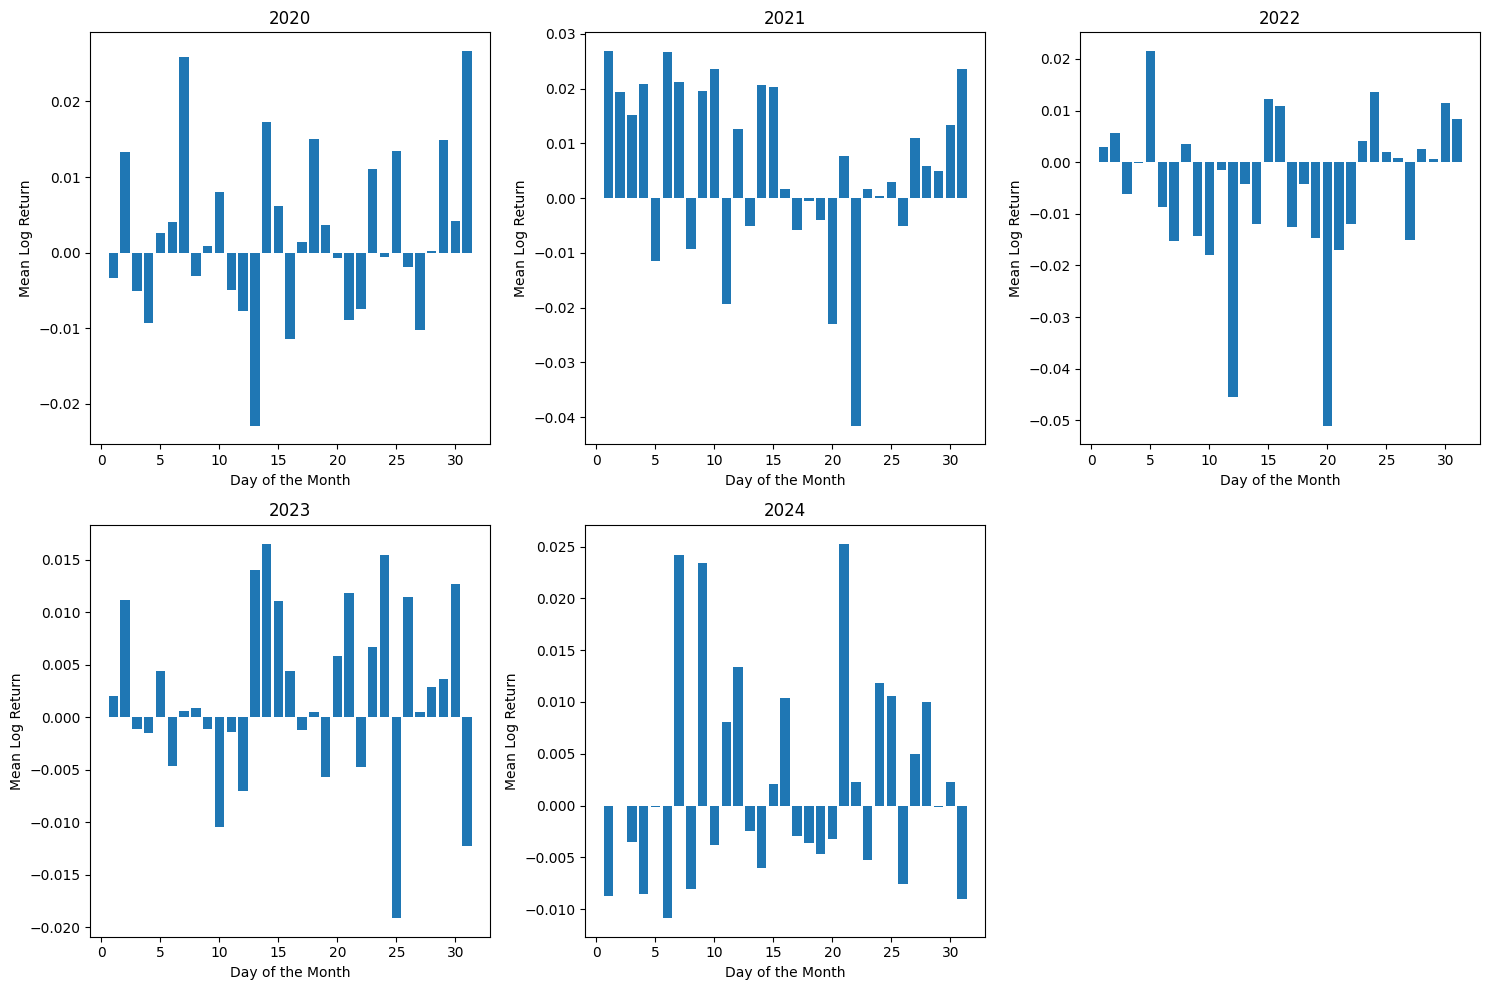

In [14]:
# plot the mean returns per day of the month, for each year in the past 5 years
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.flatten()

years = [2020, 2021, 2022, 2023, 2024]
for i, year in enumerate(years):
    year_data = aggregate[pd.to_datetime(aggregate.index).year == year]
    mean_by_day_of_month = year_data.groupby("day_of_month").mean()

    ax = axes[i]
    ax.bar(mean_by_day_of_month.index, mean_by_day_of_month["aggregate"])
    ax.set_title(f"{year}")
    ax.set_xlabel("Day of the Month")
    ax.set_ylabel("Mean Log Return")

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

Persistence through time

In [15]:
# plot a single metric (end of month returns) throughout time

# create a column for the month associated with each date
aggregate["month"] = pd.to_datetime(aggregate.index).to_period('M')

monthly_metrics = []

# group by month, and compute metric for each month
for month, month_data in aggregate.groupby("month"):
    # get number of days the current month has
    num_days = month.days_in_month

    # the last 5 days of the current month
    days_list = range(num_days - 4, num_days + 1)

    # check if current month's dataframe has data for the last 5 days of the month, only use data when it has data on last 5 days of the month
    if set(days_list).issubset(month_data["day_of_month"]):
        monthly_metric = month_data[month_data["day_of_month"].isin(days_list)]["aggregate"].sum()
        monthly_metrics.append({"month" : month, "monthly_metric": monthly_metric})

# create dataframe of monthly metrics
monthly_df = pd.DataFrame(monthly_metrics)
monthly_df.head()

,month,monthly_metric
0,2020-01,0.119644
1,2020-02,-0.186694
2,2020-03,-0.013681
3,2020-04,0.127140
4,2020-05,0.095373


Text(0, 0.5, 'Monthly Metric (Log Return)')

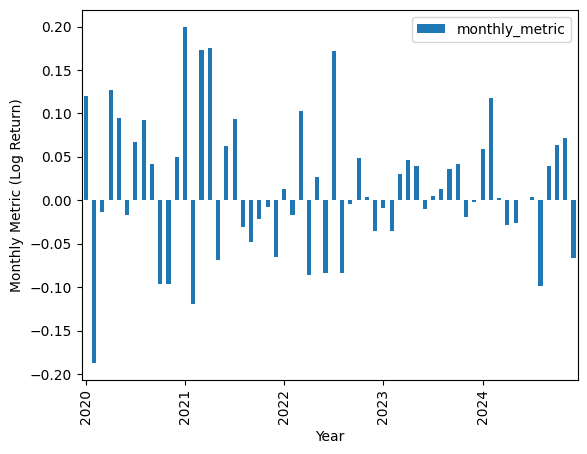

In [19]:
# plot the monthly metric
year_index = monthly_df[monthly_df["month"].dt.month == 1].index
year_labels = monthly_df.loc[year_index]["month"].dt.year

monthly_df.plot(kind="bar")
plt.xticks(year_index, year_labels);
plt.xlabel("Year")
plt.ylabel("Monthly Metric (Log Return)")

Text(0, 0.5, 'Cumulative Log Return')

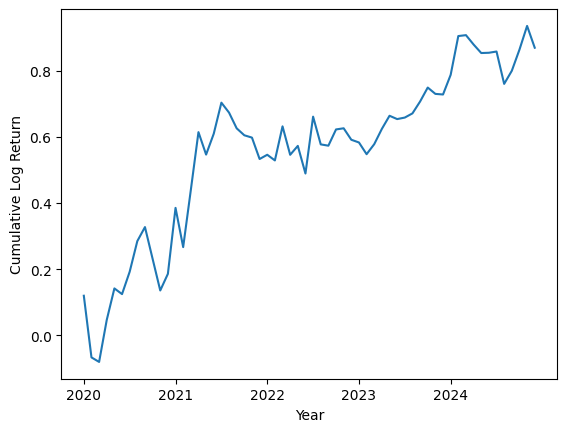

In [21]:
# plot cumulatively
monthly_df["cumulative_metric"] = monthly_df["monthly_metric"].cumsum()
monthly_df["cumulative_metric"].plot()

year_index = monthly_df[monthly_df["month"].dt.month == 1].index
year_labels = monthly_df.loc[year_index]["month"].dt.year

plt.xticks(year_index, year_labels);
plt.xlabel("Year")
plt.ylabel("Cumulative Log Return")

Statistical Test for Validity

In [17]:
from scipy import stats

In [30]:
# drop any rows in NaN values
clean_aggregate = aggregate.dropna()

In [33]:
# group returns by day of the month
grouped_by_day = clean_aggregate.groupby("day_of_month")["aggregate"].apply(list)
grouped_by_day.head()

day_of_month
1    [-0.01838475726543144, -0.01870357935900519, 0...
2    [0.013620532934081749, -0.008066950520780707, ...
3    [-0.032993221146206196, 0.010928987873321479, ...
4    [0.04810740406432166, 0.013417556948223896, -0...
5    [0.016507389704224693, 0.009220433255234129, 0...
Name: aggregate, dtype: object

In [34]:
# kruskal-willis test (generalization of ANOVA, non-parametric)
kruskal = stats.kruskal(*grouped_by_day)
kruskal.pvalue

np.float64(0.30925722655407023)

In [ ]:
# permutation test

# compute observed test statistic, mean of returns for the last 5 days of the month - mean of returns from other days of the month

mean_days_list = []
mean_non_days_list = []

# group by month, and compute mean of ends of month returns and mean of the rest of the month returns for each month
for month, month_data in aggregate.groupby("month"):

    # get number of days the current month has
    num_days = month.days_in_month

    # the last 5 days of the current month
    days_list = range(num_days - 4, num_days + 1)

    # check if current month's dataframe has data for the last 5 days of the month, only use data when it has data on last 5 days of the month
    if set(days_list).issubset(month_data["day_of_month"]):

        # get mean returns of last 5 days of current month
        mean_days = month_data[month_data["day_of_month"].isin(days_list)]["aggregate"].mean().item()
        mean_non_days = month_data[~month_data["day_of_month"].isin(days_list)]["aggregate"].mean().item()

        mean_days_list.append(mean_days)
        mean_non_days_list.append(mean_non_days)

mean_days = np.mean(mean_days_list).item()
mean_non_days = np.mean(mean_non_days_list).item()
observed_stat = mean_days - mean_non_days
observed_stat

0.0018213298644727954

In [139]:
# perform permutation test

n_permutations = 1000
test_stats = []

for _ in range(n_permutations):
    
    # compute mean of the end of month returns, and mean of rest of the month returns

    mean_days_list = []
    mean_non_days_list = []
        
    # group by month, and compute mean of ends of month returns and mean of the rest of the month returns for each month
    
    for month, month_data in aggregate.groupby("month"):

        # get number of days the current month has
        num_days = month.days_in_month

        # the last 5 days of the current month
        days_list = range(num_days - 4, num_days + 1)

        # check if current month's dataframe even has data for the last 5 days of the month
        if set(days_list).issubset(month_data["day_of_month"]):

            # shuffle day of month column
            shuffled_day_of_month = month_data["day_of_month"].sample(frac=1, replace=True)
            shuffled_day_of_month.index = month_data.index
            month_data["day_of_month"] = shuffled_day_of_month

            # get mean returns of last 5 days of current month
            mean_days = month_data[month_data["day_of_month"].isin(days_list)]["aggregate"].mean()
            mean_non_days = month_data[~month_data["day_of_month"].isin(days_list)]["aggregate"].mean()

            mean_days_list.append(mean_days)
            mean_non_days_list.append(mean_non_days)
    
    mean_days = np.mean(mean_days_list).item()
    mean_non_days = np.mean(mean_non_days_list).item()

    # compute test statistic
    test_stat = mean_days - mean_non_days

    # append to list
    test_stats.append(test_stat)

p_value = np.mean(np.abs(test_stats) >= np.abs(observed_stat))
p_value

np.float64(0.433)

Checking for day-of-the-month seasonality - Bitcoin

In [22]:
bitcoin = log_returns[["bitcoin"]]
bitcoin["day_of_month"] = pd.to_datetime(bitcoin.index).day
bitcoin.head()

C:\Users\steph\AppData\Local\Temp\ipykernel_19288\215055169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin["day_of_month"] = pd.to_datetime(bitcoin.index).day


,bitcoin,day_of_month
timestamp,,
2020-01-02 00:00:00.000,NaN,2
2020-01-03 00:00:00.000,-0.032480,3
2020-01-04 00:00:00.000,0.047189,4
2020-01-05 00:00:00.000,0.006966,5
2020-01-06 00:00:00.000,-0.000191,6


In [23]:
# compute the mean of bitcoin returns, grouped by day of the month
mean_by_day_of_month = bitcoin.groupby("day_of_month").mean()
mean_by_day_of_month.head()

,bitcoin
day_of_month,
1,0.000024
2,0.005803
3,-0.003389
4,-0.001138
5,0.003587


Text(0, 0.5, 'Mean Log Return')

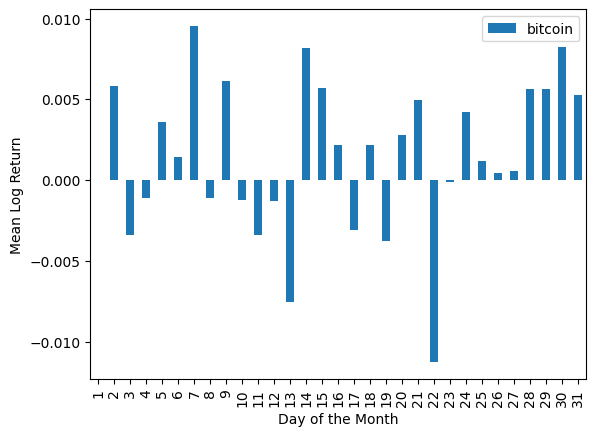

In [27]:
# plot the mean of bitcoin returns, grouped by day of the month
mean_by_day_of_month.plot(kind="bar")
plt.xlabel("Day of the Month")
plt.ylabel("Mean Log Return")

In [25]:
# compute median of the aggregate returns, grouped by day of the month
median_by_day_of_month = bitcoin.groupby("day_of_month").median()
median_by_day_of_month.head()

,bitcoin
day_of_month,
1,-0.003844
2,0.004541
3,-0.006482
4,-0.000821
5,0.007461


Text(0, 0.5, 'Median Log Return')

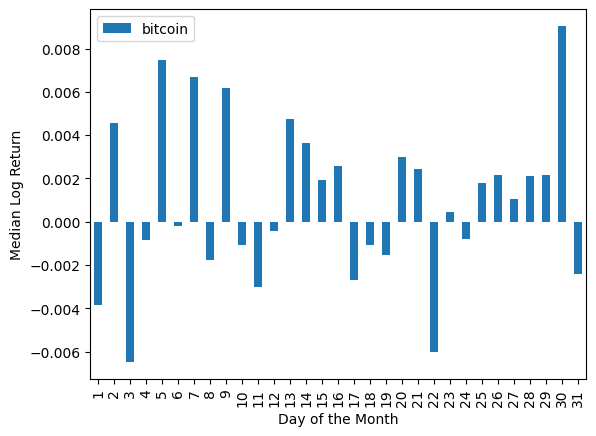

In [26]:
# plot median of aggregate returns, grouped by day of the week - maybe mean was dominated by outliers
median_by_day_of_month.plot(kind="bar")
plt.xlabel("Day of the Month")
plt.ylabel("Median Log Return")

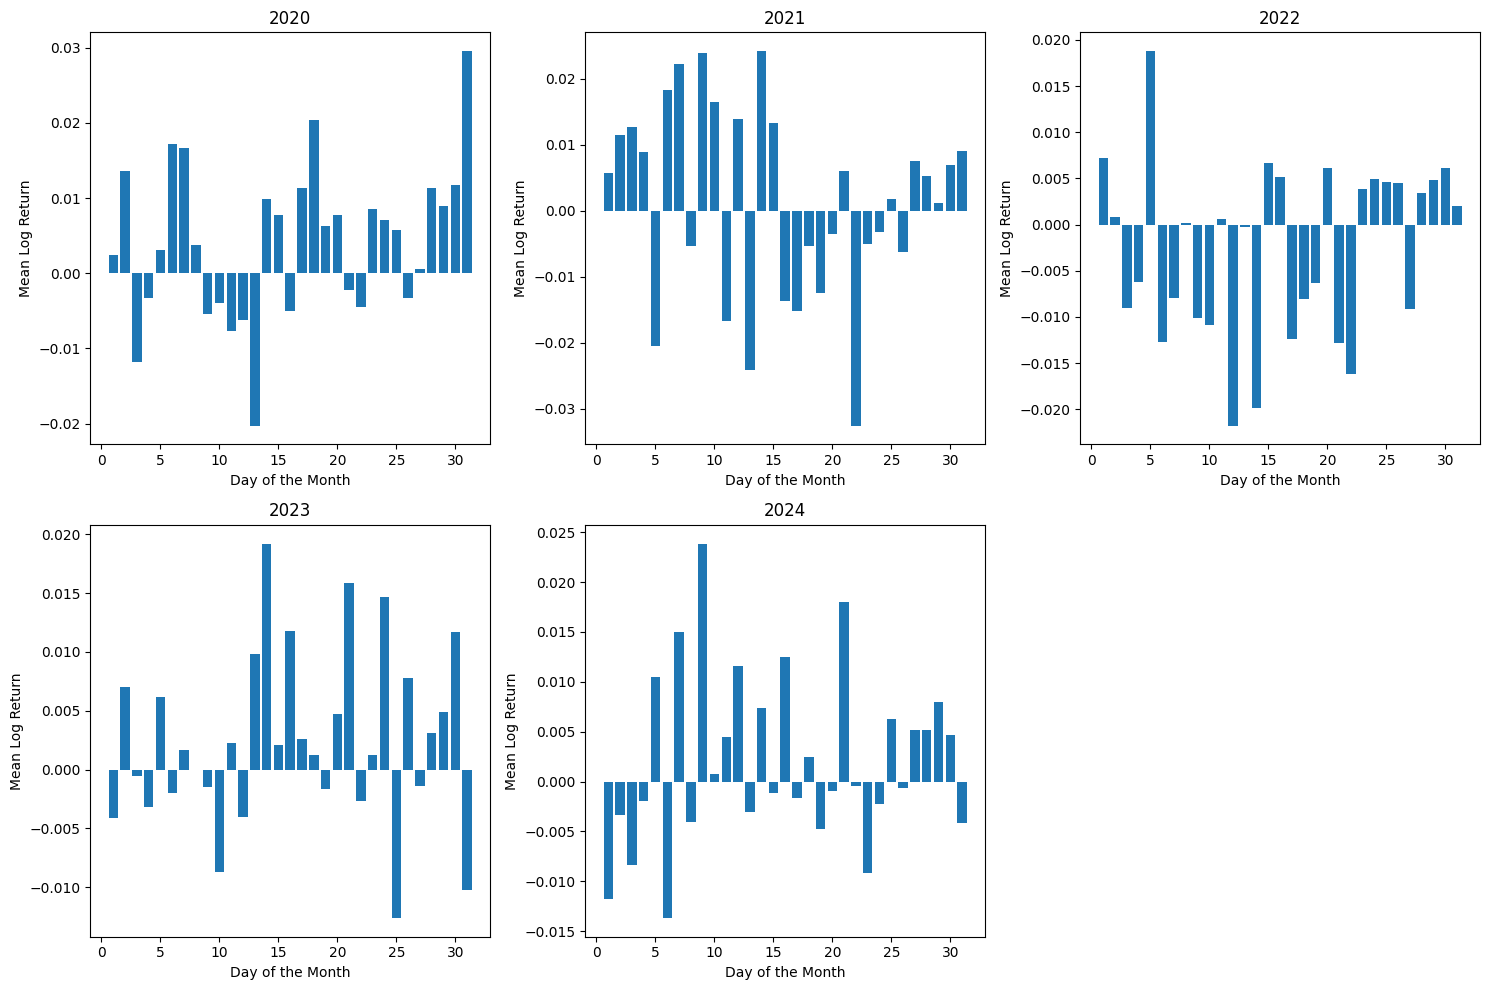

In [29]:
# plot the mean returns per day of the month, for each year in the past 5 years
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.flatten()

years = [2020, 2021, 2022, 2023, 2024]
for i, year in enumerate(years):
    year_data = bitcoin[pd.to_datetime(bitcoin.index).year == year]
    mean_by_day_of_month = year_data.groupby("day_of_month").mean()

    ax = axes[i]
    ax.bar(mean_by_day_of_month.index, mean_by_day_of_month["bitcoin"])
    ax.set_title(f"{year}")
    ax.set_xlabel("Day of the Month")
    ax.set_ylabel("Mean Log Return")

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

As single metric through time (checking for persistence)

In [30]:
# plot a single metric (end of month returns) throughout time

# create a column for the month associated with each date
bitcoin["month"] = pd.to_datetime(bitcoin.index).to_period('M')

monthly_metrics = []

# group by month, and compute metric for each month
for month, month_data in bitcoin.groupby("month"):
    # get number of days the current month has
    num_days = month.days_in_month

    # the last 5 days of the current month
    days_list = range(num_days - 4, num_days + 1)

    # check if current month's dataframe has data for the last 5 days of the month, only use data when it has data on last 5 days of the month
    if set(days_list).issubset(month_data["day_of_month"]):
        monthly_metric = month_data[month_data["day_of_month"].isin(days_list)]["bitcoin"].sum()
        monthly_metrics.append({"month" : month, "monthly_metric": monthly_metric})

# create dataframe of monthly metrics
monthly_df = pd.DataFrame(monthly_metrics)
monthly_df.head()

C:\Users\steph\AppData\Local\Temp\ipykernel_19288\1012914604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin["month"] = pd.to_datetime(bitcoin.index).to_period('M')


,month,monthly_metric
0,2020-01,0.130222
1,2020-02,-0.131929
2,2020-03,-0.044707
3,2020-04,0.154128
4,2020-05,0.084057


Text(0, 0.5, 'Monthly Metric (Log Return)')

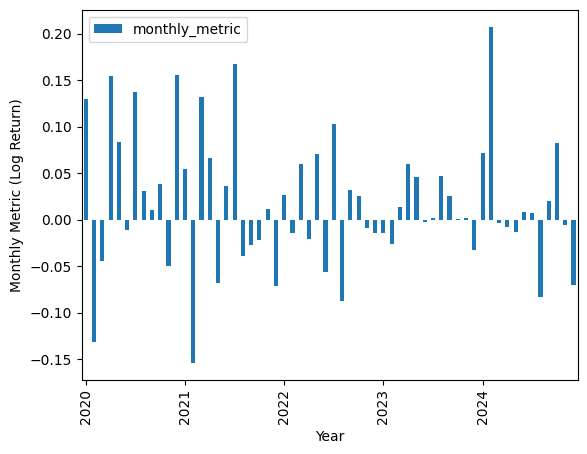

In [31]:
# plot the monthly metric
year_index = monthly_df[monthly_df["month"].dt.month == 1].index
year_labels = monthly_df.loc[year_index]["month"].dt.year

monthly_df.plot(kind="bar")
plt.xticks(year_index, year_labels);
plt.xlabel("Year")
plt.ylabel("Monthly Metric (Log Return)")

Text(0, 0.5, 'Cumulative Log Return')

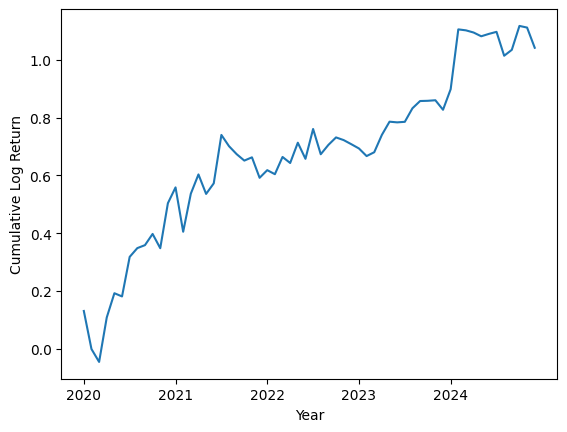

In [32]:
# plot cumulatively
monthly_df["cumulative_metric"] = monthly_df["monthly_metric"].cumsum()
monthly_df["cumulative_metric"].plot()

year_index = monthly_df[monthly_df["month"].dt.month == 1].index
year_labels = monthly_df.loc[year_index]["month"].dt.year

plt.xticks(year_index, year_labels);
plt.xlabel("Year")
plt.ylabel("Cumulative Log Return")

Statistical Test of Significance

In [14]:
# drop any rows in NaN values
clean_bitcoin = bitcoin.dropna()

In [16]:
# group returns by day of the month
grouped_by_day = clean_bitcoin.groupby("day_of_month")["bitcoin"].apply(list)
grouped_by_day.head()

day_of_month
1    [-0.021442663705105513, -0.019032336207056515,...
2    [0.005908975546577186, 0.001730426295860971, 0...
3    [-0.032480278422501445, -0.002652985331651069,...
4    [0.04718890845290281, -0.0031644160661549355, ...
5    [0.00696577743916258, -0.013949527305193507, 0...
Name: bitcoin, dtype: object

In [18]:
# kruskal-willis test (generalization of ANOVA, non-parametric)
kruskal = stats.kruskal(*grouped_by_day)
kruskal.pvalue

np.float64(0.15429644934173053)

In [19]:
# permutation test

# compute observed test statistic, mean of returns for the last 5 days of the month - mean of returns from other days of the month

mean_days_list = []
mean_non_days_list = []

# group by month, and compute mean of ends of month returns and mean of the rest of the month returns for each month
for month, month_data in bitcoin.groupby("month"):

    # get number of days the current month has
    num_days = month.days_in_month

    # the last 5 days of the current month
    days_list = range(num_days - 4, num_days + 1)

    # check if current month's dataframe has data for the last 5 days of the month, only use data when it has data on last 5 days of the month
    if set(days_list).issubset(month_data["day_of_month"]):

        # get mean returns of last 5 days of current month
        mean_days = month_data[month_data["day_of_month"].isin(days_list)]["bitcoin"].mean().item()
        mean_non_days = month_data[~month_data["day_of_month"].isin(days_list)]["bitcoin"].mean().item()

        mean_days_list.append(mean_days)
        mean_non_days_list.append(mean_non_days)

mean_days = np.mean(mean_days_list).item()
mean_non_days = np.mean(mean_non_days_list).item()
observed_stat = mean_days - mean_non_days
observed_stat

0.002447473611323331

In [20]:
# perform permutation test

n_permutations = 1000
test_stats = []

for _ in range(n_permutations):
    
    # compute mean of the end of month returns, and mean of rest of the month returns

    mean_days_list = []
    mean_non_days_list = []
        
    # group by month, and compute mean of ends of month returns and mean of the rest of the month returns for each month
    
    for month, month_data in bitcoin.groupby("month"):

        # get number of days the current month has
        num_days = month.days_in_month

        # the last 5 days of the current month
        days_list = range(num_days - 4, num_days + 1)

        # check if current month's dataframe even has data for the last 5 days of the month
        if set(days_list).issubset(month_data["day_of_month"]):

            # shuffle day of month column
            shuffled_day_of_month = month_data["day_of_month"].sample(frac=1, replace=True)
            shuffled_day_of_month.index = month_data.index
            month_data["day_of_month"] = shuffled_day_of_month

            # get mean returns of last 5 days of current month
            mean_days = month_data[month_data["day_of_month"].isin(days_list)]["bitcoin"].mean()
            mean_non_days = month_data[~month_data["day_of_month"].isin(days_list)]["bitcoin"].mean()

            mean_days_list.append(mean_days)
            mean_non_days_list.append(mean_non_days)
    
    mean_days = np.mean(mean_days_list).item()
    mean_non_days = np.mean(mean_non_days_list).item()

    # compute test statistic
    test_stat = mean_days - mean_non_days

    # append to list
    test_stats.append(test_stat)

p_value = np.mean(np.abs(test_stats) >= np.abs(observed_stat))
p_value

np.float64(0.232)